In [ ]:
knitr::opts_chunk$set(echo = TRUE)
source('transaction_weights_calibration4.R')
source('comparison_between_size_metrics_sloc.R')
source('data_selection.R')
library(jsonlite)
library(reshape)
library(tidyverse)
library(fitdistrplus)
library(egg)
library(gridExtra)
library(plyr)
library(MASS)

In [ ]:
cutsAsVec <- function(x) {
  ret <- c("Cut Points:")
  for (row in rownames(x)) {
    cutPoints <- round(x[row, ], digits = 1)
    ret <- c(ret, paste(row,":", paste(cutPoints, collapse = ", ")))
  }
  ret
}

# Combined Data Effort Values

In [ ]:
dataSet <- selectData("modelEvaluations-1-3.csv")
modelData <- dataSet[["modelData"]]
combined <- dataSet[["combined"]]
effort <- dataSet[["effort"]]
transactionFiles <- dataSet[["transactionFiles"]]

In [ ]:
#we can select different chunks of data to do the sensitivity analysis

ggplot(modelData[!(modelData$UseCase_Num==0),], aes(x=UseCase_Num)) + 
  geom_histogram(binwidth=5, colour="black", fill="gray") + 
  xlab("Number of Use Cases") + ylab("Number of Projects") +
  theme_bw(base_size=14)

ggplot(modelData[!(modelData$Tran_Num==0),], aes(x=Tran_Num)) + 
  geom_histogram(binwidth=20, colour="black", fill="gray") + 
  xlab("Number of Transactions") + ylab("Number of Projects") +
  theme_bw(base_size=14)

ggplot(modelData, aes(x=KSLOC)) + 
  geom_histogram(binwidth=0.5, colour="black", fill="gray") + 
  xlab("KSLOC") + ylab("Number of Projects") + 
   theme_bw(base_size=14)

ggplot(modelData, aes(x=Personnel)) + 
  geom_histogram(binwidth=1, colour="black", fill="gray") + 
  xlab("Personnel") + ylab("Number of Projects")  + 
   theme_bw(base_size=14)

ggplot(modelData[!(modelData$Effort==0),], aes(x=Effort)) + 
  geom_histogram(binwidth=200, colour="black", fill="gray") + 
  xlab("Effort") + ylab("Number of Projects")  + 
   theme_bw(base_size=14)

unique.levels <- sort(unique(modelData$Type))
count <- table(modelData$Type)
count.modelData <- data.frame(unique.levels, count)

ggplot(count.modelData, aes(unique.levels, count)) + 
  geom_bar(stat="identity", colour="black", fill="gray") + 
  xlab("Project Type") + ylab("Number of Projects") + 
   theme_bw(base_size=14)


distParams = list();
distParams[['TL']] = list(shape=6.543586, rate=1.160249);
distParams[['TD']] = list(shape=3.6492150, rate=0.6985361);
distParams[['DETs']] = list(shape=1.6647412, rate=0.1691911);

#print(distParams[['TD']][['shape']])

#effort$Project <- NULL
ggplot(combined, aes(x=TL)) + 
  geom_histogram(aes(y = ..density..), binwidth=1, colour="black", fill="white") + 
  #stat_function(fun = dnorm, args = list(mean = mean(combined$TL), sd(combined$TL))) + 
  stat_function(fun = dgamma, args = distParams[['TL']]) + 
  xlab("TL") + ylab("Density")+ ggtitle("Combined TL Data Summary") + 
  annotate("text", x=14, y=0.25, label= "Gamma: shape=6.54, rate=1.16; KS: p-value < 0.01")+
  theme_bw(base_size=15)

#Ks parameteric test
#parametricKStest(combined[, "TL"])

ggplot(combined, aes(x=TD)) + 
  geom_histogram(aes(y = ..density..), binwidth=0.5, colour="black", fill="white") + 
  #stat_function(fun = dnorm, args = list(mean = mean(combined$TD), sd(combined$TD))) +
  #stat_function(fun = dgamma, args = list(shape=3.6492150, rate=0.6985361 )) +
  stat_function(fun = dgamma, args = distParams[['TD']]) +
  annotate("text", x=16, y=0.18, label= "Gamma: shape=3.65, rate=0.70; KS: p-value < 0.01")+
  xlab("TD") + ylab("Density") +ggtitle("Combined TD Data Summary") + 
  theme_bw()

#Ks parameteric test
#parametricKStest(combined[, "TD"])

ggplot(combined, aes(x=DETs)) + 
  geom_histogram(aes(y = ..density..), binwidth=1, colour="black", fill="white") + 
  #stat_function(fun = dnorm, args = list(mean = mean(combined$DETs), sd(combined$DETs))) + 
  stat_function(fun = dgamma, args = distParams[['DETs']]) + 
  #stat_function(fun = dgamma, args = list(shape=1.6902002, rate=0.1692468)) + 
  annotate("text", x=57, y=0.15, label= "Gamma: shape=1.66, rate=0.17; KS: p-value < 0.01")+
  xlab("DETs") + ylab("Density") + ggtitle("Combined DETs Data Summary") + 
  theme_bw()

#Ks parameteric test
#parametricKStest(combined[, "DETs"])

selectedModels = list()

In [ ]:
distParams = list();
distParams[['TL']] = list(shape=6.543586, rate=1.160249);
distParams[['TD']] = list(shape=3.6492150, rate=0.6985361);
distParams[['DETs']] = list(shape=1.6647412, rate=0.1691911);

#print(distParams[['TD']][['shape']])

#effort$Project <- NULL
ggplot(combined, aes(x=TL)) + 
  geom_histogram(aes(y = ..density..), binwidth=1, colour="black", fill="white") + 
  #stat_function(fun = dnorm, args = list(mean = mean(combined$TL), sd(combined$TL))) + 
  stat_function(fun = dgamma, args = distParams[['TL']]) + 
  xlab("TL") + ylab("Density")+ ggtitle("Combined TL Data Summary") + 
  annotate("text", x=14, y=0.25, label= "Gamma: shape=6.54, rate=1.16; KS: p-value < 0.01")+
  theme_bw(base_size=15)

#Ks parameteric test
#parametricKStest(combined[, "TL"])

ggplot(combined, aes(x=TD)) + 
  geom_histogram(aes(y = ..density..), binwidth=0.5, colour="black", fill="white") + 
  #stat_function(fun = dnorm, args = list(mean = mean(combined$TD), sd(combined$TD))) +
  #stat_function(fun = dgamma, args = list(shape=3.6492150, rate=0.6985361 )) +
  stat_function(fun = dgamma, args = distParams[['TD']]) +
  annotate("text", x=16, y=0.18, label= "Gamma: shape=3.65, rate=0.70; KS: p-value < 0.01")+
  xlab("TD") + ylab("Density") +ggtitle("Combined TD Data Summary") + 
  theme_bw()

#Ks parameteric test
#parametricKStest(combined[, "TD"])

ggplot(combined, aes(x=DETs)) + 
  geom_histogram(aes(y = ..density..), binwidth=1, colour="black", fill="white") + 
  #stat_function(fun = dnorm, args = list(mean = mean(combined$DETs), sd(combined$DETs))) + 
  stat_function(fun = dgamma, args = distParams[['DETs']]) + 
  #stat_function(fun = dgamma, args = list(shape=1.6902002, rate=0.1692468)) + 
  annotate("text", x=57, y=0.15, label= "Gamma: shape=1.66, rate=0.17; KS: p-value < 0.01")+
  xlab("DETs") + ylab("Density") + ggtitle("Combined DETs Data Summary") + 
  theme_bw()

#Ks parameteric test
#parametricKStest(combined[, "DETs"])

selectedModels = list()

# SWTIII Search Results

In [ ]:
SWTIIIresults <- performSearch(6, effort, combined, transactionFiles, c("TL", "TD", "DETs"))


In [ ]:
# Plot classification results
for (i in 1:length(SWTIIIresults)) {
  result <- SWTIIIresults[[i]]
  data <- subset(result$data, select = -c(Effort))
  df <- as.data.frame(t(data))
  g <- ggplot(data = df, aes(x = rownames(df), y = Aggregate)) + 
    geom_bar(stat = "identity") +
    scale_x_discrete(limits = paste("l", 1:length(data), sep=""))+
      xlab("Levels") +
    ylab("Counts") +
    ggtitle(paste("Classification Results:", i*3-3+1, "levels")) +
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))+
    theme_bw(base_size=15)
  cutsVec <- cutsAsVec(result$cuts)
  g <- g + geom_text(data = data.frame(cutsVec), aes(label=cutsVec, col=cutsVec), alpha=0, x=1, y=1) +
  theme(legend.key=element_blank(), legend.title = element_blank()) +
  guides(colour=guide_legend(override.aes=list(size=0)), reverse = TRUE)
  print(g)
}

# Plot predicted vs. actual effort values
predictedValuesSWTIII <- sapply(1:length(SWTIIIresults), function(i) {
  predicted <- apply(SWTIIIresults[[i]]$data, 1, function(x) {
    blmpredicted <- predict.blm(SWTIIIresults[[i]]$model, newdata = as.data.frame(t(x)))
    #blmpredicted*SWTIIIresults[[i]]$normFactor
  })
})

colnames(predictedValuesSWTIII) <- paste(1:length(SWTIIIresults), "Bins")
predictedValuesSWTIII <- subset(predictedValuesSWTIII, rownames(predictedValuesSWTIII) != "Aggregate")
predictedValuesSWTIII <- merge(as.data.frame(predictedValuesSWTIII), effort, by='row.names', all=TRUE)
rownames(predictedValuesSWTIII) <- predictedValuesSWTIII$Row.names
predictedValuesSWTIII$Row.names <- NULL

r2Vals <- apply(subset(predictedValuesSWTIII, select = -Effort), 2, function (x) {
  dat <- data.frame(Predicted = x, Effort = predictedValuesSWTIII$Effort)
  model <- lm(Effort ~ ., data = dat)
  summary(model)$r.squared
})
r2Vals <- round(r2Vals, digits = 5)
r2Vals <- paste("R2:", r2Vals, sep = "")
predictedValues <- gather(predictedValuesSWTIII, numBins, Predicted, -Effort)
r2data_txt <- data.frame(label = as.character(r2Vals), numBins = paste(1:length(SWTIIIresults), "Bins"))
ggplot(predictedValues, aes(x = Predicted, y = Effort)) +
  geom_point(shape = 1) + stat_smooth(method = "lm",  se = FALSE, fullrange = TRUE) +
  facet_wrap(. ~ numBins, scales = "free", nrow=2) + xlab("Predicted Effort") +
  ylab("Actual Effort") + ggtitle("Goodness of Fit") +
  theme(panel.spacing = unit(1, "lines")) +
  geom_text(data = r2data_txt, size = 3, mapping = aes(x = -Inf, y = -Inf, label = label),
            hjust = -1, vjust = -1) + 
  theme_bw()

# Plots cross validation results
R2data <- data.frame(NumBins = 1:length(SWTIIIresults), R2=r2Vals)
MSEdata <- data.frame(NumBins = 1:length(SWTIIIresults), MSE = sapply(SWTIIIresults, function(x) { x$MSE }))
MMREdata <- data.frame(NumBins = 1:length(SWTIIIresults), MMRE = sapply(SWTIIIresults, function(x) { x$MMRE }))
PREDdata <- data.frame(NumBins = 1:length(SWTIIIresults), PRED = sapply(SWTIIIresults, function(x) { x$PRED }))
ggplot(data = MSEdata, aes(x = NumBins, y = log(MSE))) + geom_point(shape = 1) + geom_line() + ggtitle("MSE vs Number of Bins") + 
  theme_bw(base_size=20)
ggplot(data = MMREdata, aes(x = NumBins, y = MMRE)) + geom_point(shape = 1) + geom_line() + ggtitle("MMRE vs Number of Bins") + 
  theme_bw(base_size=20)
ggplot(data = PREDdata, aes(x = NumBins, y = PRED)) + geom_point(shape = 1) + geom_line() + ylab("PRED(0.25)") + ggtitle("PRED vs Number of Bins") + 
  theme_bw(base_size=20)

mergedMMREPREDIII <- merge(MMREdata, PREDdata, by="NumBins")
mergedMMREPREDIII <- merge(mergedMMREPREDIII, R2data, by="NumBins")

# Plot marginal posteriors for each parameter
for (i in 1:length(SWTIIIresults)) {
  marginalData <- SWTIIIresults[[i]]$model[, !names(SWTIIIresults[[i]]$model) %in% c("(Intercept)", "sigma")]
  if (is.vector(marginalData)) {
    marginalData <- data.frame(TL1TD1DETs1 = marginalData)
  }

  for (col in names(marginalData)) {
    mean <- mean(marginalData[, col])
    sd <- sd(marginalData[, col])
    peakDensity <- dnorm(mean, mean, sd)
    g <- ggplot(marginalData, aes(x=marginalData[, col])) + 
    geom_histogram(aes(y = ..density..), binwidth = 1, colour="black", fill="white") + 
    stat_function(fun = dnorm, args = list(mean = mean(mean), sd = sd)) + 
    xlab(col) + ggtitle(paste("Posterior Weight", col, i, "bins")) +
    annotate("text", x = mean, y = peakDensity * ((sd/3 *.1) + 1), label = paste("mean:", round(mean,2),",", "sd:", round(sd,2))) + 
    theme_bw()
    print(g)
  }

}

## plot the selected models

In [ ]:
SWTIIIModelSelector <- 3;
SWTIIIModelPredictedValues = as.data.frame(predictedValuesSWTIII[, c(paste(SWTIIIModelSelector, "Bins", sep=" "))])
SWTIIIModelData <- SWTIIIresults[[SWTIIIModelSelector]][["data"]] 
SWTIIIModelData <- SWTIIIModelData[rownames(SWTIIIModelData) != "Aggregate", ]
colnames(SWTIIIModelPredictedValues) <- c("DUCP")
rownames(SWTIIIModelPredictedValues) <- rownames(predictedValuesSWTIII)

predictedValues <- merge(SWTIIIModelPredictedValues, effort, by='row.names', all=TRUE)
rownames(predictedValues) <- predictedValues$Row.names
predictedValues$Row.names <- NULL

r2Vals <- apply(subset(predictedValues, select = -Effort), 2, function (x) {
  dat <- data.frame(Predicted = x, Effort = predictedValues$Effort)
  dat <- na.omit(dat)
  model <- lm(Effort ~ ., data = dat)
  totVar <- sum((dat$Predicted-mean(dat$Predicted))^2)
  print(totVar)
  resVar <- sum((dat$Effort-dat$Predicted)^2)
  R2 <- 1-(resVar/totVar)
  ftest <- var.test(dat$Predicted-mean(dat$Effort), dat$Predicted-dat$Effort, alternative = "two.sided")
  print(ftest)
  print(R2)
  print(summary(model))
  c(summary(model)$r.squared,ftest$p.value)
})

r2Vals <- as.data.frame(t(r2Vals))
colnames(r2Vals) <- c("R2", "PValue")

r2Vals$R2 <- round(r2Vals$R2, digits = 2)
r2Vals$PValue <- round(r2Vals$PValue, digits = 3)
r2Vals <- paste("R2:", r2Vals$R2, " P:",r2Vals$PValue, sep = "")
predictedValues <- gather(predictedValues, models, Predicted, -Effort)
r2data_txt <- data.frame(label = as.character(r2Vals), models = c("DUCP"))
ggplot(predictedValues, aes(x = Predicted, y = Effort)) +
  geom_point(shape = 1) + stat_smooth(method = "lm",  se = FALSE, fullrange = TRUE) +
  facet_grid(. ~ models, scales = "free") + xlab("Predicted Effort") +
  ylab("Actual Effort") +
  theme(panel.spacing = unit(1, "lines")) +
  geom_text(data = r2data_txt, size = 3, mapping = aes(x = -Inf, y = -Inf, label = label),
            hjust = -0.4, vjust = -1)+
  theme_bw()

#plot only DUCP
predictedValuesDUCP <- merge(SWTIIIModelPredictedValues, effort, by='row.names', all=TRUE)
rownames(predictedValuesDUCP) <- predictedValuesDUCP$Row.names
predictedValuesDUCP$Row.names <- NULL

r2Vals <- apply(subset(predictedValuesDUCP, select = -Effort), 2, function (x) {
  dat <- data.frame(Predicted = x, Effort = predictedValuesDUCP$Effort)
  model <- lm(Effort ~ ., data = dat)
  print(summary(model))
  summary(model)$r.squared
})

r2Vals <- round(r2Vals, digits = 5)
r2Vals <- paste("R2:", r2Vals, sep = "")
r2data_txt <- data.frame(label = as.character(r2Vals))

ggplot(predictedValuesDUCP, aes(x = DUCP, y = Effort)) +
  geom_point(shape = 1) + stat_smooth(method = "lm",  se = FALSE, fullrange = TRUE) + xlab("Predicted Effort") +
  ylab("Actual Effort") + ggtitle("Goodness of Fit") +
  theme(panel.spacing = unit(1, "lines")) +
  geom_text(data = r2data_txt, size = 5, mapping = aes(x = -Inf, y = -Inf, label = label),
            hjust = -5, vjust = -1)+
  theme_bw(base_size=20)


#draw example of posterior estimates III
  marginalData <- SWTIIIresults[[SWTIIIModelSelector]]$model[, !names(SWTIIIresults[[SWTIIIModelSelector]]$model) %in% c("(Intercept)", "sigma", "sd")]
  colnames(marginalData) <- c(paste("l", 1:7, sep=""), "Effort Adj.")
    #for (col in names(marginalData)) {
    means <- apply(marginalData, 2, mean)
    sd <- apply(marginalData, 2, sd)
    labels <- paste(colnames(marginalData), ": Est.~", round(means,2),"; SD.~", round(sd,2),sep="")
    print(labels)
    
  colnames(marginalData) <- labels
  
  gatheredData <- gather(marginalData, level, value)
    
    normaldens <- ddply(gatheredData, "level", function(df) {
      values <- seq(min(df$value), max(df$value), length = 100)

      data.frame( 
       value = values,
       density = dnorm(values, mean(df$value), sd(df$value))
      )
    })
    
    ggplot(gatheredData, aes(value))  + 
  geom_histogram(aes(y = ..density..), colour="black", fill="white") +
  geom_line(aes(y = density), data = normaldens, colour = "red") +
  facet_wrap(~ level, scales = "free", nrow=4) + xlab("Posterior Estimates") +ylab("Density")+
      theme_bw(base_size=12)


meltMergedMMREPREDIII = melt(mergedMMREPREDIII, id.vars=c("NumBins", "R2"))
colnames(meltMergedMMREPREDIII) <- c("Bins", "R2", "Method", "Value")

ggplot(data = meltMergedMMREPREDIII, aes(x = Bins, y = Value)) + geom_point(shape = 1) + geom_line() + facet_grid(rows=vars(Method), scales="free_y") +theme_bw()
#ggplot(data = meltMergedMMREPREDII, aes(x = Bins, y = Value)) + geom_point(shape = 1) + geom_line() + facet_wrap(.~Method, scales="free_y", ncol=1) + theme_bw()
    
#plot the model selection results
meltMergedMMREPREDIII$Model <- rep("DUCP", nrow(meltMergedMMREPREDIII)) 

meltMergedMMREPREDIII$Value <- apply(meltMergedMMREPREDIII, 1, function(x){
  print(x)
  if(x['Method'] == "PRED"){
    -as.numeric(x['Value'])
    }
  else{
    as.numeric(x['Value'])
    }
  })

require(dplyr)
meltMergedMMREPREDIII <- meltMergedMMREPREDIII %>% 
          arrange(Model, Method, Value, -Bins) %>%
          group_by(Model,Method) %>%
          mutate(Rank=1:6)

meltMergedMMREPREDIII$Value <- apply(meltMergedMMREPREDIII, 1, function(x){
  print(x)
  if(x['Method'] == "PRED"){
    -as.numeric(x['Value'])
    }
  else{
    as.numeric(x['Value'])
    }
  })

sumRank <- as.data.frame(t(tapply(meltMergedMMREPREDIII$Rank, meltMergedMMREPREDIII[, c("Model","Bins")], sum)))
sumRank$Bins <- 1:nrow(sumRank)
sumRank <- melt(sumRank, id.vars="Bins")
colnames(sumRank) <- c("Bins", "Model", "SumRank")
sumRank <- as.data.frame(sumRank)
library(dplyr)
sumRank <- sumRank %>% 
  arrange(Model,SumRank,-Bins) %>%
  group_by(Model) %>%
  mutate(SumRank=1:6)

meltMergedMMREPREDIII <- merge(sumRank, meltMergedMMREPREDIII, by=c("Bins", "Model"), all=TRUE)
          
#print.data.frame(meltMergedMMREPREDIII)

meltMergedMMREPREDCols <- unique(meltMergedMMREPREDIII[, c("Bins","Model","SumRank","R2")])
meltMergedMMREPREDCols <- meltMergedMMREPREDCols %>% 
          arrange(Model)

meltMergedMMREPREDCols$Label <- paste(meltMergedMMREPREDCols$Bins, "\n", meltMergedMMREPREDCols$SumRank, "\n", substr(meltMergedMMREPREDCols$R2,4,7), sep = "")

ggplot(data = meltMergedMMREPREDIII, aes(x = Bins, y = Value)) + geom_point(shape = 1) +geom_text(aes(label=Rank),hjust=0, vjust=0) + geom_line() +facet_grid(vars(Method), vars(Model), scales="free_y") +scale_x_discrete(aes(breaks = Bins), labels=meltMergedMMREPREDCols$Label[7:12],limits=1:6)+theme_bw()+xlab("Bins")+ylab("Accuracy Measurements")
    

## comparison between SWTIII, UCP, COCOMO, a-priori COCOMO using cross-validation

In [ ]:
otherSizeMetricsData=modelData[c("Effort", "KSLOC", "COCOMO_Estimate", "Priori_COCOMO_Estimate", "UCP", "IFPUG", "MKII", "COSMIC")]
otherSizeMetricsData <- na.omit(otherSizeMetricsData)

#for testing
model3 <- SWTIIIresults[[SWTIIIModelSelector]][["model"]]
#ret <- compareBetweenSizeMetrics(TNModelData, SWTIIModelData, SWTIIIModelData, otherSizeMetricsData, model1, model2, model3)

#comparisonRet <- compareBetweenSizeMetrics(SWTIIIModelData, otherSizeMetricsData)

#model <- model3

In [ ]:
#adjust if SWTIIIModelData and otherSizeMetricsData don't match
to_remove <- setdiff(unique(otherSizeMetricsData$Effort), unique(SWTIIIModelData$Effort))
otherSizeMetricsData <- otherSizeMetricsData[!otherSizeMetricsData$Effort %in% to_remove,]

In [ ]:
#save as csv
#write.csv(SWTIIIModelData, file='SWTIIIModelData.csv', quote=F, row.names = T)
#write.csv(otherSizeMetricsData, file='otherSizeMetricsData.csv', quote=F, row.names = F)

In [ ]:
#read from csv
#SWTIIIModelData <- read.csv('SWTIIIModelData.csv')
#otherSizeMetricsData <- read.csv('otherSizeMetricsData.csv')

In [ ]:
comparisonRet <- compareBetweenSizeMetrics(SWTIIIModelData, otherSizeMetricsData, model3)
cvResults <-comparisonRet[["cvResults"]]
#cvResults
foldResults <-comparisonRet[["foldResults"]]
#foldResults


In [ ]:
#save as csv
#write.csv(cvResults, file='cvResults.csv', quote=F, row.names = F)
#write.csv(foldResults, file='foldResults.csv', quote=F, row.names = F)

In [400]:
#read from csv
cvResults <- as.matrix(read.csv('cvResults.csv'))
foldResults <- as.matrix(read.csv('foldResults.csv'))

In [ ]:
avgPreds <- comparisonRet[["avgPreds"]]
print('average improvement by ducp')
print(colMeans(avgPreds[, "DUCP"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by ucp')
print(colMeans(avgPreds[, "UCP"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by cocomo')
print(colMeans(avgPreds[, "COCOMO"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by cocomo.apriori')
print(colMeans(avgPreds[, "COCOMO Apriori"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by IFPUG')
print(colMeans(avgPreds[, "IFPUG"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by MKII')
print(colMeans(avgPreds[, "MKII"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by COSMIC')
print(colMeans(avgPreds[, "COSMIC"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by SLOC')
print(colMeans(avgPreds[, "SLOC"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))
print('average improvement by SLOC_LN')
print(colMeans(avgPreds[, "SLOC_LN"] - avgPreds[,!colnames(avgPreds) %in% c("Pred")]))

avgPreds <- data.frame(avgPreds)
print(avgPreds)
meltAvgPreds = melt(avgPreds, id.vars="Pred")
colnames(meltAvgPreds) <- c("Pred", "Method", "Value")

print("melt avg preds info")
print(meltAvgPreds)
ggplot(meltAvgPreds) + theme_bw() + geom_point(aes(x=Pred, y=Value, group=Method,color=Method),size=3)+ xlab("Relative Deviation (%)") +
				ylab("Percentage of Estimates <= x%")+ theme(legend.position="bottom")

print("melt avg preds info as lines and smooth function")
ggplot(meltAvgPreds) + theme_bw() + 
		geom_line(aes(y=Value, x=Pred, group=Method,color=Method)) +
		stat_smooth(aes(y=Value, x=Pred, group=Method,color=Method), method = lm, formula = y ~ poly(x, 10), se = FALSE)+ xlab("Relative Deviation (%)") +
		ylab("Percentage of Estimates <= x%")+ theme(legend.position="bottom")


print("melt avg preds info as dots and smooth function")
ggplot(meltAvgPreds) + theme_bw() + 
		geom_point(aes(x=Pred, y=Value, group=Method,color=Method,shape=Method),size=1.5) +
		scale_shape_manual(values=c(0,1,2,3,4,5,6,7,8,9,10))+
		stat_smooth(aes(x=Pred, y=Value, group=Method,color=Method), method = lm, formula = y ~ poly(x, 10), se = FALSE)+ xlab("Relative Deviation (%)") +
		ylab("Percentage of Estimates <= x%")+ theme(legend.position="bottom")

# bootstrapping

In [ ]:
source("comparison_between_size_metrics_sloc2.R")
bsRet <- bootstrappingSE(SWTIIIModelData, otherSizeMetricsData, model3, 10000, 0.83)
bsEstimations <- bsRet[['bsEstimations']]
iterResults <- bsRet[['iterResults']]

In [ ]:
#save as csv
#write.csv(bsEstimations, file='bsEstimations.csv', quote=F, row.names = F)
#write.csv(iterResults, file='iterResults.csv', quote=F, row.names = F)

In [372]:
#read from csv
#bsEstimations <- read.csv('bsEstimations.csv')
#rownames(bsEstimations) <- c('lower','mean','upper')
#iterResults <- read.csv('iterResults.csv')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'bsEstimations.csv'”

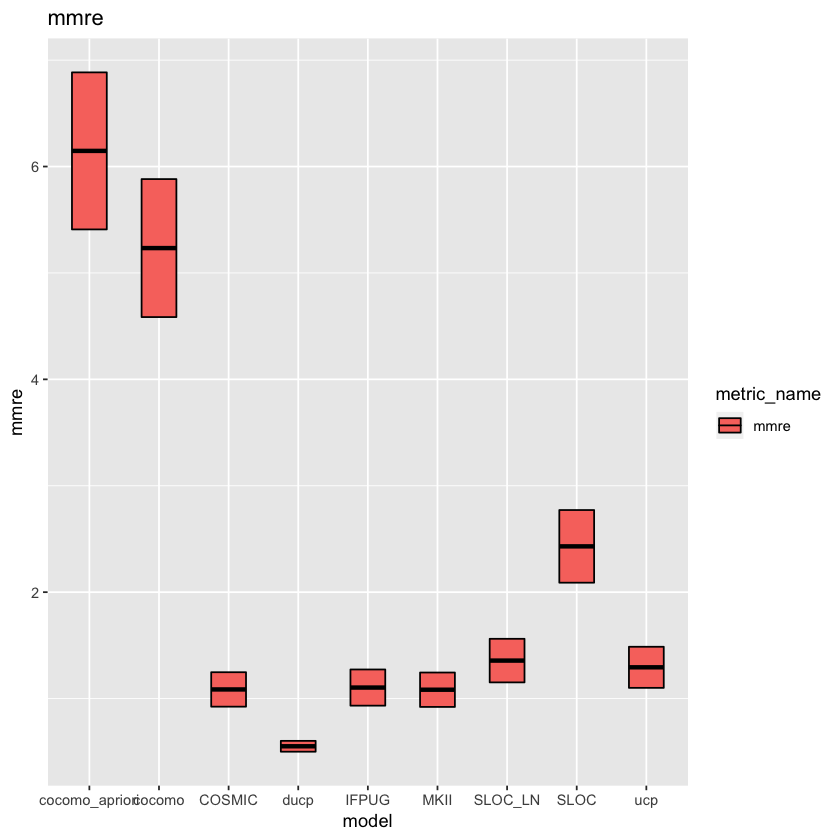

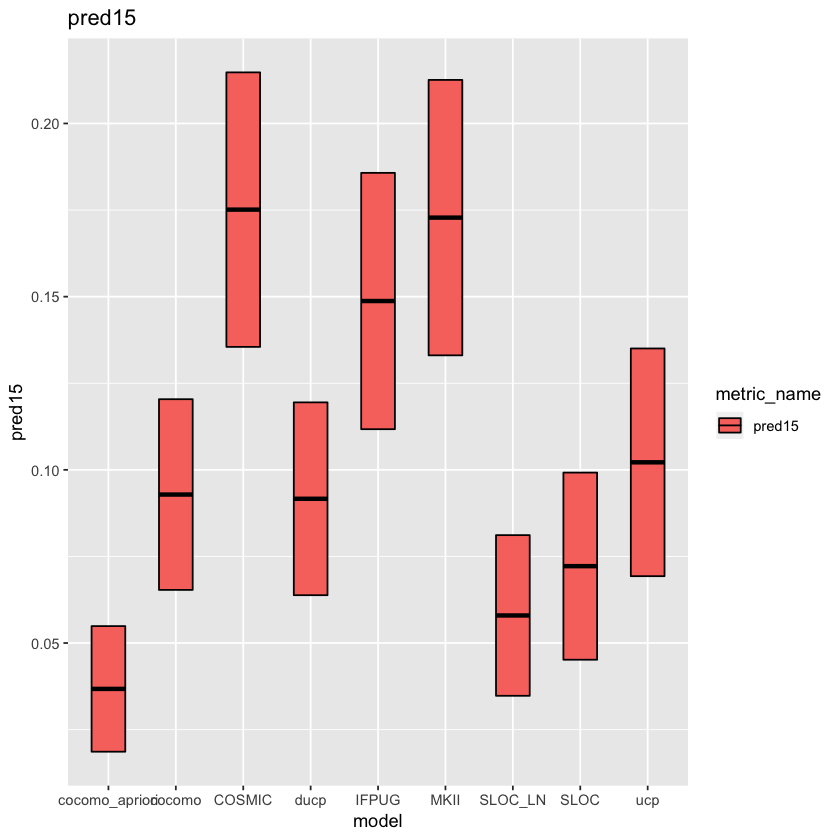

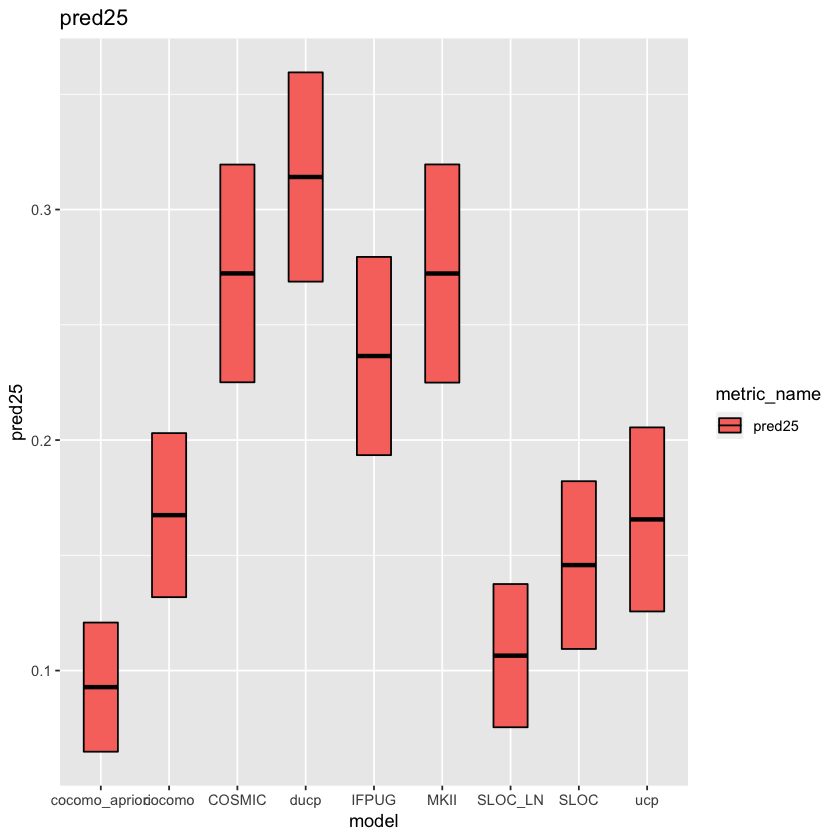

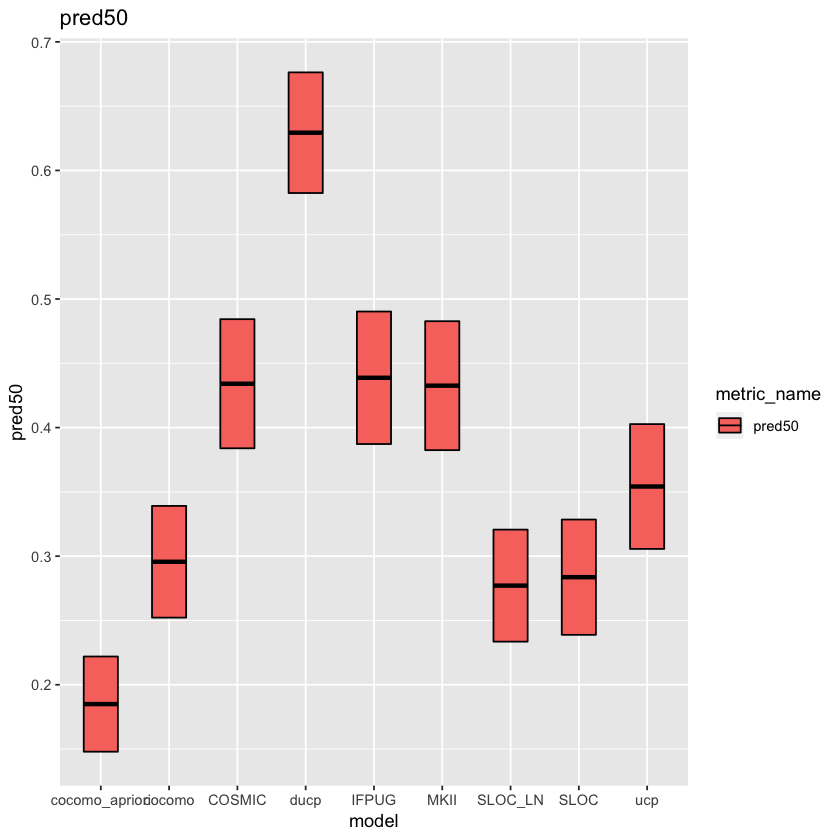

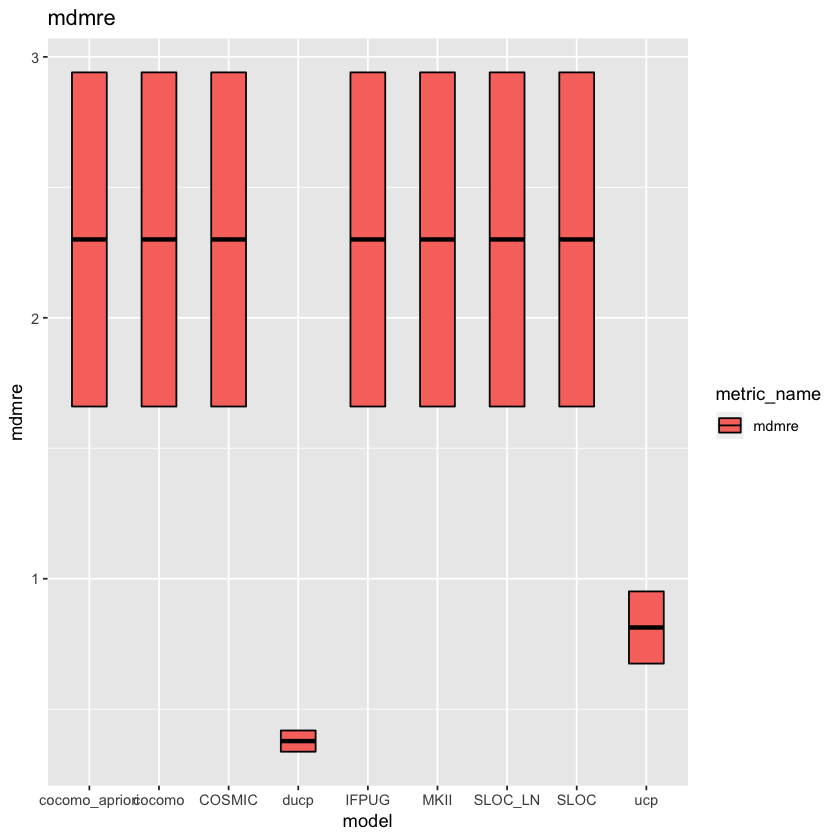

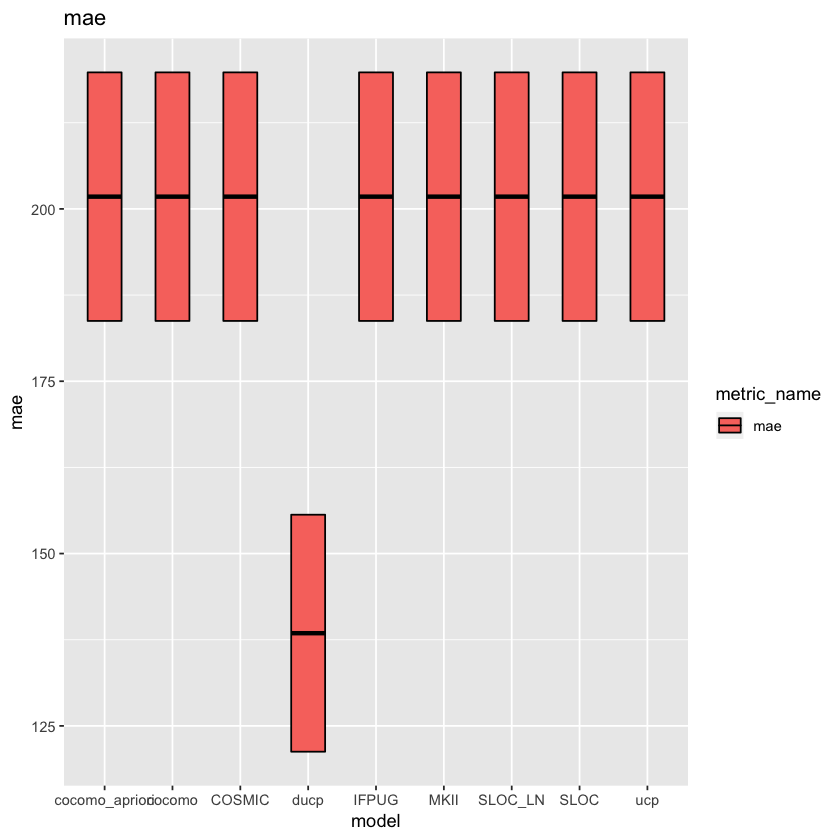

In [375]:
# plot bootstrapping results
model_metric_name <- c(
        'ducp_mmre','ducp_pred15','ducp_pred25','ducp_pred50', "ducp_mdmre", "ducp_mae",
        'ucp_mmre','ucp_pred15','ucp_pred25','ucp_pred50', "ucp_mdmre", "ucp_mae",
        'cocomo_mmre','cocomo_pred15','cocomo_pred25','cocomo_pred50', "cocomo_mdmre", "cocomo_mae",
        'cocomo_apriori_mmre','cocomo_apriori_pred15','cocomo_apriori_pred25','cocomo_apriori_pred50', "cocomo_apriori_mdmre", "cocomo_apriori_mae",
        'IFPUG_mmre','IFPUG_pred15','IFPUG_pred25','IFPUG_pred50', "IFPUG_mdmre", "IFPUG_mae",
        'MKII_mmre','MKII_pred15','MKII_pred25','MKII_pred50', "MKII_mdmre", "MKII_mae",
        'COSMIC_mmre','COSMIC_pred15','COSMIC_pred25','COSMIC_pred50', "COSMIC_mdmre", "COSMIC_mae",
        'SLOC_mmre','SLOC_pred15','SLOC_pred25','SLOC_pred50', "SLOC_mdmre", "SLOC_mae",
        'SLOC_LN_mmre','SLOC_LN_pred15','SLOC_LN_pred25','SLOC_LN_pred50', "SLOC_LN_mdmre", "SLOC_LN_mae")

model_name <- c(
        'ducp','ducp','ducp','ducp','ducp','ducp',
        'ucp','ucp','ucp','ucp','ucp','ucp',
        'cocomo','cocomo','cocomo','cocomo','cocomo','cocomo',
        'cocomo_apriori','cocomo_apriori','cocomo_apriori','cocomo_apriori','cocomo_apriori','cocomo_apriori',
        'IFPUG','IFPUG','IFPUG','IFPUG','IFPUG','IFPUG',
        'MKII','MKII','MKII','MKII','MKII','MKII',
        'COSMIC','COSMIC','COSMIC','COSMIC','COSMIC','COSMIC',
        'SLOC','SLOC','SLOC','SLOC','SLOC','SLOC',
        'SLOC_LN','SLOC_LN','SLOC_LN','SLOC_LN','SLOC_LN','SLOC_LN')

metric_name <- c('mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae",
                 'mmre','pred15','pred25','pred50', "mdmre", "mae")


df <- data.frame(t(bsEstimations))
df$label <- model_metric_name
df$model_name <- model_name
df$metric_name <- metric_name

gb_metric <- c('mmre','pred15','pred25','pred50', "mdmre", "mae")

for (i in 1:length(gb_metric)){
    g = gb_metric[i]
    selectedData <- df[df$metric_name == g,]
    p <- ggplot(selectedData, aes(x = label, y = mean, ymin = lower, ymax = upper, fill = metric_name)) + 
    geom_crossbar(width = 0.5, position = "dodge") + 
    #coord_flip() +
    scale_x_discrete(breaks=selectedData$label, labels=as.vector(selectedData$model_name)) +
    xlab('model') +
    ylab(g) +
    ggtitle(g)
    print(p)
}


# family-wise significance test

In [419]:
source('familywiseHypoTest.R')

In [420]:
sig_cv <- familywiseHypoTest(iterationResults=foldResults)

In [378]:
sig_bs <- familywiseHypoTest(iterationResults=iterResults)

In [421]:
head(sig_cv)

model1,model2,metric,direction,model1_mean,model2_mean,p_value,BH_p_value,bonferroni_p_value
ducp,ucp,mmre,-,0.5555503,1.329658,0.007759273,0.10038983,1.0000000
ducp,cocomo,mmre,-,0.5555503,5.282596,0.001222885,0.09226673,0.2641433
ducp,cocomo_apriori,mmre,-,0.5555503,6.206281,0.005197267,0.10038983,1.0000000
ducp,IFPUG,mmre,-,0.5555503,1.115393,0.033446891,0.21248613,1.0000000
ducp,MKII,mmre,-,0.5555503,1.091179,0.036081668,0.21538605,1.0000000
ducp,COSMIC,mmre,-,0.5555503,1.093786,0.036965217,0.21538605,1.0000000


In [383]:
head(sig_bs)

model1,model2,metric,direction,model1_mean,model2_mean,p_value,BH_p_value,bonferroni_p_value
ducp,ucp,mmre,-,0.5516365,1.293783,0,0,0
ducp,cocomo,mmre,-,0.5516365,5.233602,0,0,0
ducp,cocomo_apriori,mmre,-,0.5516365,6.146991,0,0,0
ducp,IFPUG,mmre,-,0.5516365,1.103436,0,0,0
ducp,MKII,mmre,-,0.5516365,1.083147,0,0,0
ducp,COSMIC,mmre,-,0.5516365,1.085768,0,0,0


In [384]:
#save as csv
#write.csv(sig_cv, file='sig_cv.csv', quote=F, row.names = T)
#write.csv(sig_bs, file='sig_cv.csv', quote=F, row.names = T)